In [1]:
from typing import TypedDict # Imports all the data types we need
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: list[str]
    final: str

In [3]:
def first_node(state:AgentState) -> AgentState:
    "First node of the sequence"

    state['final'] = f"{state['name']}, welcome to the system!"
    return state

def second_node(state:AgentState) -> AgentState:
    "Second node of the sequence"
    state['final'] = state['final'] + f"! You're {state['age']} years old!"
    return state

def third_node(state:AgentState) -> AgentState: 
    "Third node of the sequence"
    state['final'] = state['final'] + f"! You have skills in {': '.join(state['skills'])}."
    return state

In [4]:
graph = StateGraph(AgentState)

graph.add_node('first_node', first_node)
graph.add_node('second_node', second_node)
graph.add_node('third_node', third_node)

graph.set_entry_point('first_node')
graph.add_edge('first_node', 'second_node')
graph.add_edge('second_node', 'third_node')
graph.set_finish_point('second_node')

app = graph.compile()

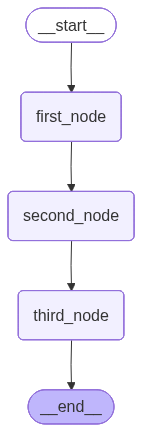

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
result = app.invoke({'name': "Linda", 'age': 30, "skills":["Python", "Machine Learning", "LangGraph"]})
print(result)

{'name': 'Linda', 'age': 30, 'skills': ['Python', 'Machine Learning', 'LangGraph'], 'final': "Linda, welcome to the system!! You're 30 years old!! You have skills in Python: Machine Learning: LangGraph."}


In [17]:
result["final"]

"Linda, welcome to the system!! You're 30 years old!! You have skills in Python: Machine Learning: LangGraph."